Build a 2 layers auto-encoder with TensorFlow to compress images to a lower latent space and then reconstruct them

References:
*   Gradient-based learning applied to document recognition. Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. Proceedings of the IEEE, 86(11):2278-2324, November 1998.



In [0]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

W0815 22:33:36.623011 139958419101568 deprecation.py:323] From <ipython-input-3-3033b8b99067>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0815 22:33:36.626178 139958419101568 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0815 22:33:36.629862 139958419101568 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting /tmp/data/train-images-idx3-ubyte.gz


W0815 22:33:36.957808 139958419101568 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0815 22:33:36.961057 139958419101568 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0815 22:33:37.021481 139958419101568 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: __init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a f

Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
# Training parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network parameters
num_hidden_1 = 256 # 1st layer num of features
num_hidden_2 = 128 # 2nd layer num of features
num_input = 784  # MNIST data input (image shape 28*28)

In [0]:
# tf graph
X = tf.placeholder(tf.float32, [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input]))
}

bias = {
    'encoder_b1':tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2':tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1':tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2':tf.Variable(tf.random_normal([num_input]))
}

In [0]:
# build the encoder
def encoder(x):
  # encode hidden layer with sigmoid activation #1
  layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                bias['encoder_b1']))
  # encode hidden layer with sigmoid activation #2
  layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                bias['encoder_b2']))
  return layer_2

# build the decoder
def decoder(x):
  #decode hidden layer with sigmoid activation #1
  layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                bias['decoder_b1']))
  #decode hidden layer with sigmoid activation #2
  layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                bias['decoder_b2']))
  return layer_2

In [0]:
# construct the model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [14]:
# prediction
y_pred = decoder_op

# targets are input data
y_true = X

# define loss and optimizer, minimize squared error
loss = tf.reduce_mean(tf.pow(y_true-y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()

W0815 22:49:23.924453 139958419101568 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1205: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0815 22:49:23.979377 139958419101568 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/training/rmsprop.py:119: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
with tf.Session() as sess:
  sess.run(init)
  
  #training
  for i in range(1, num_steps+1):
    #prepare data
    #get batch of mnist data
    batch_x, _ = mnist.train.next_batch(batch_size)
    
    # run optimization and loss op to get cost value
    _, l = sess.run([optimizer, loss], feed_dict = {X:batch_x})
    # display logs per step
    if (i% display_step ==0 or i==1):
      print("Steps",i, "Loss", l)
      
    # Testing
  # encode and decode images from test set and visualize reconstruction
  n=4
  canvas_orig = np.empty((28*n, 28*n))
  canvas_recon = np.empty((28*n, 28*n))

  for i in range(n):
    # MNIST test data
    batch_x, _ = mnist.test.next_batch(n)

    #encode and decode digital image
    g = sess.run(decoder_op, feed_dict={X:batch_x})

    #display original images
    for j in range(n):
      # draw generated digits
      canvas_orig[i*28:(i+1)*28, j*28:(j+1)*28]=batch_x[j].reshape(28,28)

    #display reconstructed images
    for j in range(n):
      #draw generated digts
      canvas_recon[i*28:(i+1)*28, j*28:(j+1)*28]=batch_x[j].reshape(28,28)

Steps 1 Loss 0.45192516
Steps 1000 Loss 0.15170026
Steps 2000 Loss 0.13365683
Steps 3000 Loss 0.117610075
Steps 4000 Loss 0.1100399
Steps 5000 Loss 0.10858678
Steps 6000 Loss 0.10298723
Steps 7000 Loss 0.09911538
Steps 8000 Loss 0.096474975
Steps 9000 Loss 0.09334049
Steps 10000 Loss 0.091672294
Steps 11000 Loss 0.088520184
Steps 12000 Loss 0.08851147
Steps 13000 Loss 0.08958256
Steps 14000 Loss 0.08584206
Steps 15000 Loss 0.083057225
Steps 16000 Loss 0.083188176
Steps 17000 Loss 0.0786515
Steps 18000 Loss 0.0783022
Steps 19000 Loss 0.07865511
Steps 20000 Loss 0.07556483
Steps 21000 Loss 0.075788766
Steps 22000 Loss 0.07440791
Steps 23000 Loss 0.072267406
Steps 24000 Loss 0.07315419
Steps 25000 Loss 0.071770154
Steps 26000 Loss 0.07176898
Steps 27000 Loss 0.072043255
Steps 28000 Loss 0.06946285
Steps 29000 Loss 0.06769971
Steps 30000 Loss 0.065819874


original images


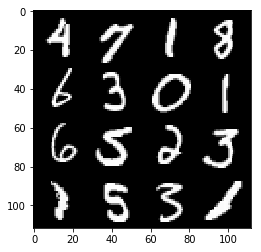

Reconstructed images


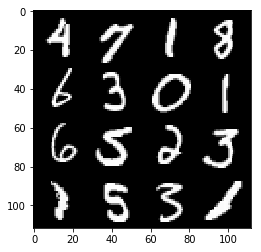

In [21]:
print("original images")
plt.figure(figsize=(n,n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed images")
plt.figure(figsize=(n,n))
plt.imshow(canvas_recon, origin="upper",cmap="gray")
plt.show()